# The Equity Price Prediction By Transformer Model
ZHANG Mian \\
Mastère Spécialisé - Mathématiques Appliquée à la Finance \\
CentraleSupélec

In [ ]:
import numpy as np
def selectStock(saving, currentValue, futureValue):
  earning = np.array(futureValue) - np.array(currentValue)
  res = np.zeros((saving+1,len(currentValue)),dtype=np.int)
  for i in range(1, saving+1):
      for j in range(len(currentValue)):
          if j==0:
              if i>=currentValue[j]:
                  if earning[j] > res[i-1][j]:
                      res[i][j] = earning[j]
                  else:
                      res[i][j] = res[i-1][j]
              else:
                  res[i][j] = 0
          else:
              res[i][j]=res[i][j-1]
              if i > currentValue[j]:
                  if res[i-currentValue[j]][j-1]+earning[j] > res[i][j]:
                      res[i][j] = res[i-currentValue[j]][j-1]+ earning[j]
                  if res[i-currentValue[j]][j]>res[i][j]:
                      res[i][j] = res[i-currentValue[j]][j]
  return res[saving][len(currentValue)-1]

In [ ]:
selectStock(250, [175,133,109,210,97],[200,125,128,228,133])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


55

In [ ]:
np.array(md)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.zeros((saving+1,len(currentValue)),dtype=int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
selectStock(250,[175,133,109,210,97,1],[200,125,128,228,133,2])

56

## ABSTRACT
Using Deep Learning to predict stock price is currently a very hot topic in Deep Learning field. Inthe existed models, most of it is using the CNN and LSTM model to analyse the time series of thestock price. In the last time’s project validation, Mr.Vincent Lepetit indicated me that Transformermodel may be a good choice to predict stock price.  And based on this information,  we start tolearning Transformer model and it’s methodology. The difficulty is that there are few created modeland it’s a challenge to create it from beginning. So we tried to construct a Transformer model anduse it to predict the stock price.  In this case, we decided to use Apple company’s stock price topredict. The reason why I use Transformer model is that transformer has become more and morepopular because their excellent feature.  It combined the self-attention mechanism, parallelizationand also the positional encoding and it’s not so unflexible like CNN or LSTM. It could take thefeature based on the learning result and it’s more flexible.  So, in this report I’m going to create atransformer model to analyse the time-series of the stock price and also try to make some predictionbased on the learning result.

## INTRODUCTION &  MOTIVATION

The project is about forecasting the equity price based on the historical price. 

The problem we are trying to solve is quite strict: Predict the price of the stock. Prediction of the stock price is a quite old topic, in the financial field there are efficiency market hypothesis which trying to say that technical analyze is useless and we can get nothing from the historical data.  

But with the birth of the Deep Learning, people start to use like LSTM model to analyze the data. But as we know that LSTM model is quite limited model and not flexible enough to learning the current stock market. While, the transformer model has the merit to overcome the difficulties.  

Based on the transformer model, the model can analyse the feature of the stock price in a unique way and it has the merit of NLP, which means we could use self-attention layer to find features from two points no matter far or near for the distance. We can use it not only analyze the Apple company's stock price but also all other companies' stock price.

So, for the potential application, I think we can use it to analyze the portfolio or set a optimal trading strategy, such as at which point should we sell or buy a stock. But it's more complicated and in this report we are going to focus on only one stock price.

## PROBLEM DEFINITION

Because it's a prediction for the 1-D time series, so the aim is very direct: **reduce the standard error for the difference between Real Price and Predict Price for a certain period**. And we don't want to set some restrictions, we would like to give the Transformer model the maximum of freedom to learning the time-series, as long as it could provide the best prediction.

## RELATED WORK

**[Stock Market Prediction]** There are a series of works predicting stock movements using text information,for example, Lavrenko et al., 2000; Schumaker and Chen, 2009; Xie et al., 2013; Peng and Jiang, 2015; Li et al., 2017. \\

Pioneering works extract different types of textual features from texts, such as bags-of-words, noun phrases, named entities, and structured events. Ding et al. [2014] showed structured events from open information extraction. Yates et al. and Fader et al. [2007; 2011] achieved better performance compared to conventional features, as they capture structured relations. However, one disadvantage of structured representations for events is that they lead to increased sparsity, which potentially limits the predictive power. Ding et al. [2015] proposed to address this issue by representing structured events and using event dense embeddings. Ding et al. [2016] leveraged ground truth from the knowledge graph to enhance event embeddings. Shah et al. [2018] retrieved, extracted, and analyzed the effects of news sentiments on the stock market. Liu et al. [2018] adopted a two-level attention mechanism to quantify the importance of the words and sentences in given news and designed a novel measurement for calculating the attention weights to avoid capturing redundant information in the news title and content. \\

**[Transformer]** Vaswani et al. [2017] presented the Transformer, the first sequence transaction model based entirely on attention, replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed selfattention. Tang et al. [2018] evaluated RNNs, CNNs, and Transformer on two tasks: subject-verb agreement and word sense disambiguation. Their experimental results showed that: \\

1) Transformer and CNNs did not outperform RNNs in modeling subject-verb agreement over long distances; \\


2) Transformer performed distinctly better than RNNs and CNNs on word sense disambiguation. Radford et al. [Radford et al., 2018] performed three different ablation studies and analyzed the effect of the Transformer by comparing it with a single layer 2048 unit LSTM using the same framework. They observed a 5.6 average score drop when using the LSTM instead of the Transformer. In our model, we obtain more semantic features through the Transformer. It is better than other baselines based on CNN and RNN.

## METHODOLOGY 
For the next part, I'm going to do it step by step.

### Import the library and data


In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data
The first problem is how to deal with the time series. Because we all know that the stock market they trade during the working day, but for Saturday and Sunday they don't trade. So to analyse it also need to consider this problem. So, formally, \textbf{how to embed the time}? \\

**Data Extraction**. First, I would like to have a basic introduction about the data. The data is download directly from $Yahoo Finance$ and it's APPLE company's stock data, from 1980-01-01 to 2021-12-02, about 10331 lines of the data and it include the Open price (The price from the start of the day), Highest price of the day, Lowest price of the day, close price of the day ,and also the volume of trading of the day. \\

In [ ]:
APPL_path = '/content/drive/MyDrive/AAPL.csv'

data = pd.read_csv(APPL_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Replace 0 to avoid dividing by 0 later on
data['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
data.sort_values('Date', inplace=True)
data.tail()

,Date,Open,High,Low,Close,Volume
10327,2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800
10328,2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200
10329,2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100
10330,2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500
10331,2021-12-02,158.740005,164.199997,157.800003,163.759995,136739200


### Data Preparation
After the import of the data, we start to do some basic processing to the data, before we put it into the Transformer model.

Here all the data is about price, no matter it's Open price, Highest Price of the day, Lowest price of the day, or the price at the closing point. But it's not very stable, in terms of the time-series analyse, there are some trend and it will affect the analysing result.

So, in order to get rid of the "trend" affect, we decided to use the differential method to calculate the variation and the percentage.

With this process, the learning obtained by the model from our dataset is more effective for future predictions. Here is an overview of what the transformed data will look like.

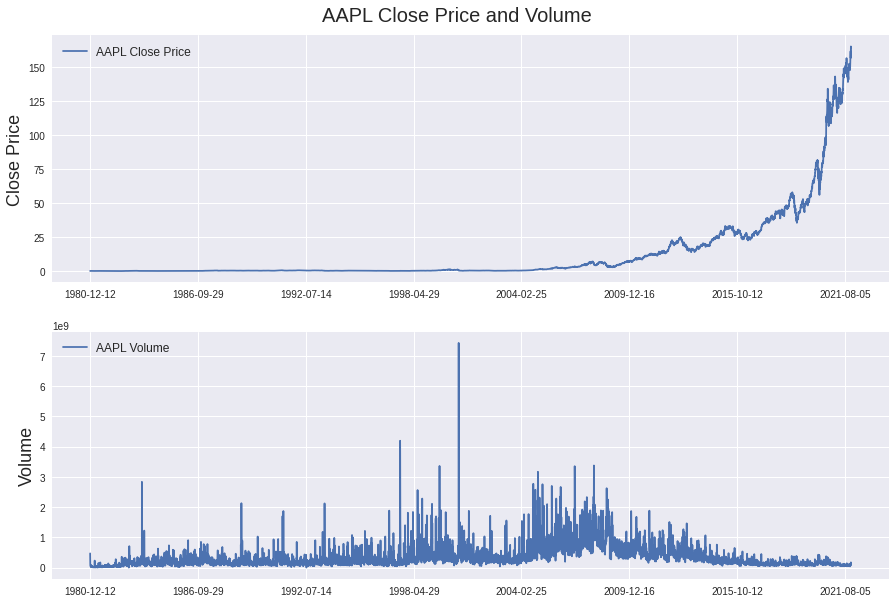

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("AAPL Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(data['Close'], label='AAPL Close Price')
ax1.set_xticks(range(0, data.shape[0], 1464))
ax1.set_xticklabels(data['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(data['Volume'], label='AAPL Volume')
ax2.set_xticks(range(0, data.shape[0], 1464))
ax2.set_xticklabels(data['Date'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

### Data Separation 

Here we want to separate the data into 3 sets, traing set, test set and validation set. 

For each sequence day, the 4 price features (Open, High, Low, Close) and the Volume feature are present, resulting in 5 features per day. During a single training step, our Transformer model will receive 32 sequences (batch_size = 32) that are 128 days long (seq_len=128) and have 5 features per day as input.

In [ ]:
data['Open'] = data['Open'].pct_change() # Create arithmetic returns column
data['High'] = data['High'].pct_change() # Create arithmetic returns column
data['Low'] = data['Low'].pct_change() # Create arithmetic returns column
data['Close'] = data['Close'].pct_change() # Create arithmetic returns column
data['Volume'] = data['Volume'].pct_change()

data.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

In [ ]:
times = sorted(data.index.values)
last_10pct = sorted(data.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(data.index.values)[-int(0.2*len(times))] # Last 20% of series

In [ ]:
min_return = min(data[(data.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(data[(data.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

In [ ]:
# Min-max normalize price columns (0-1 range)
data['Open'] = (data['Open'] - min_return) / (max_return - min_return)
data['High'] = (data['High'] - min_return) / (max_return - min_return)
data['Low'] = (data['Low'] - min_return) / (max_return - min_return)
data['Close'] = (data['Close'] - min_return) / (max_return - min_return)

In [ ]:
'''Normalize volume column'''

min_volume = data[(data.index < last_20pct)]['Volume'].min(axis=0)
max_volume = data[(data.index < last_20pct)]['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
data['Volume'] = (data['Volume'] - min_volume) / (max_volume - min_volume)

In [ ]:
data

,Date,Open,High,Low,Close,Volume
1,1980-12-15,0.519610,0.515062,0.514813,0.514813,0.002903
2,1980-12-16,0.491758,0.491758,0.491388,0.491388,0.004678
3,1980-12-17,0.594127,0.599562,0.599697,0.599697,0.006376
4,1980-12-18,0.604377,0.604224,0.604377,0.604377,0.006628
5,1980-12-19,0.639730,0.639415,0.639730,0.639730,0.005156
...,...,...,...,...,...,...
10327,2021-11-26,0.564283,0.560882,0.549711,0.537426,0.008655
10328,2021-11-29,0.571001,0.577473,0.589534,0.596522,0.009010
10329,2021-11-30,0.576677,0.602027,0.580237,0.607230,0.015350
10330,2021-12-01,0.624045,0.604252,0.604195,0.568846,0.006816


### Time Embeddings

There are two main ideas to consider : 

1.  A meaningful representation of time has to include both periodic and non-periodic patterns. For example there are weekends between 2 trading day, so even if the trading day is next to each other, there are still some periodic elements that affect the result.

2.  The data's scale may varied with the time, that is to say, the data may become much bigger. So the solution is quite simple, we do a normalization for different periods.

Combining the ideas of periodic and non-periodic patterns as well as the invariance to time rescaling we are presented by the following mathematical definition: 

\begin{equation}
t2v(\tau)[i] =
    \begin{cases}
    \omega_{i}\tau + \varphi_{i},  i = 0 \\
    F(\omega_{i}\tau + \varphi_{i}), 1<i<k
    \end{cases}
\end{equation}

The time vector  $t2v$ is comprised of two components, where $\omega_{i}\tau + \varphi_{i}$ represents the non-periodic and $F(\omega_{i}\tau + \varphi_{i})$  is the periodic feature of the time vector.

Then we change it into $t2v(\tau) = \omega_{i}\tau + \varphi_{i}$, it's not complicated and it's just a linear function. $\omega $ in $\omega_{i}\tau + \varphi_{i}$ is a matrix that defines the slope of our time-series $\tau $ and $\varphi$ in simple terms is a matrix that defines where our time-series $\tau $ intersects with the y-axis. Hence, $\omega_{i}\tau + \varphi_{i}$ is a linear function. 

The second component $F(\omega_{i}\tau + \varphi_{i})$ represents the periodic feature of the time vector. Just like before we have the linear term $\omega_{i}\tau + \varphi_{i}$ again, however, this time the linear function is wrapped in an additional function $F($ $)$. The authors experimented with different functions to best describe a periodic relationship (sigmoid, tanh, ReLU, mod, triangle, etc.). In the end, a sine-function achieved the best and most stable performance (cosine achieved similar results). When combining the linear function $\omega_{i}\tau + \varphi_{i}$ with a sine function the 2D representation looks as follows. φ shifts the sine function along the x-axis and ω determines the wavelength of the sine function.

So after that we want to implement the data into the Keras model, currently our Time2Vector Layer has 2 sub-function: build and call. For the build function, we create 4 matrices for $\omega$ and $\varphi$. \\

Next we have to du a reformation for the input: (batch_size, seq_len, 5) → (32, 128, 5). 
1. The batch_size defines how many stock price sequences we want to feed into the model at once. 
2. The seq_len parameter determines the length of a single stock price sequence. 
3. The number 5 is derived from the fact that we have 5 features of the daily APPL stock recording (Open price, High price, Low price, Close price, Volume).

The first calculation step excludes the Volume and takes an average across the Open, High, Low, and Close prices, resulting in the shape (batch_size, seq_len) .

After the time embedding,we will start to create the Transformer Model. \\


In [ ]:
'''Create training, validation and test split'''

data_train = data[(data.index < last_20pct)]  # Training data are 80% of total data
data_val = data[(data.index >= last_20pct) & (data.index < last_10pct)]
data_test = data[(data.index >= last_10pct)]

# Remove date column
data_train.drop(columns=['Date'], inplace=True)
data_val.drop(columns=['Date'], inplace=True)
data_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = data_train.values
val_data = data_val.values
test_data = data_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

data_train.head()

Training data shape: (8265, 5)
Validation data shape: (1033, 5)
Test data shape: (1033, 5)


,Open,High,Low,Close,Volume
1,0.519610,0.515062,0.514813,0.514813,0.002903
2,0.491758,0.491758,0.491388,0.491388,0.004678
3,0.594127,0.599562,0.599697,0.599697,0.006376
4,0.604377,0.604224,0.604377,0.604377,0.006628
5,0.639730,0.639415,0.639730,0.639730,0.005156


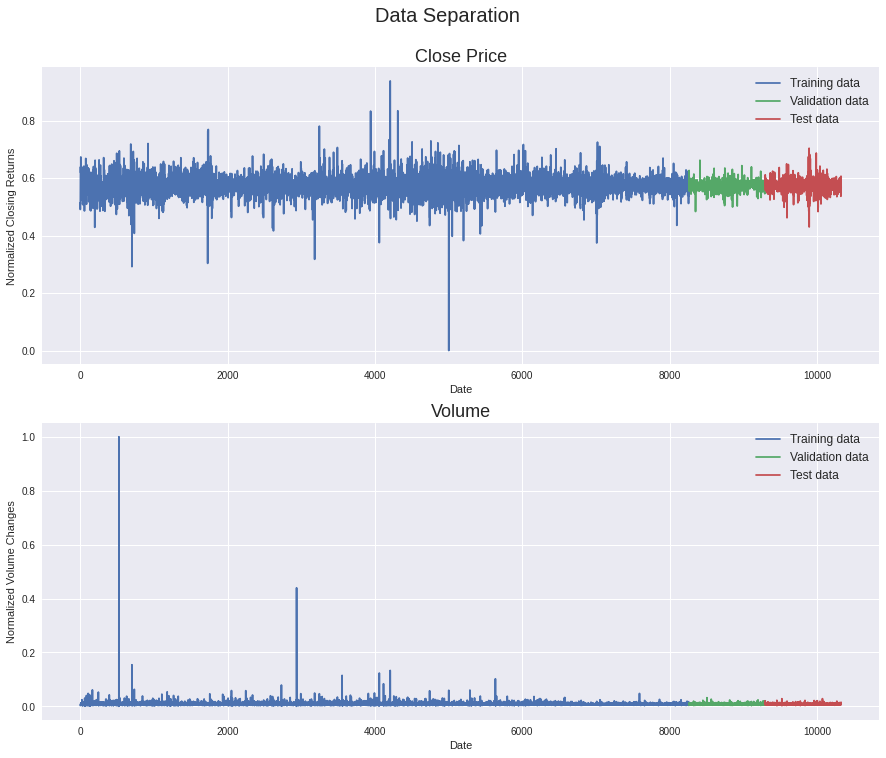

In [ ]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), data_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), data_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), data_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), data_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), data_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), data_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [ ]:
train_data[:,3].shape

(8265,)

In [ ]:
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (8137, 128, 5) (8137,)
Validation set shape (905, 128, 5) (905,)
Testing set shape (905, 128, 5) (905,)


AttributeError: ignored

### Transformer

After the embedding for the time and the next step is the construction of the transformer. A Transformer is a neural network architecture that uses a self-attention mechanism, allowing the model to focus on the relevant parts of the time-series to improve prediction qualities. 

The self-attention mechanism consists of a **Single-Head Attention** and **Multi-Head Attention layer**. 

**The self-attention mechanism** is able to connect all time-series steps with each other at once, leading to the creation of long-term dependency understandings. Finally, all these processes are parallelized within the Transformer architecture, allowing an acceleration of the learning process.
Combining Apple data and time features — Feeding the Transformer.


After having implemented the Time Embeddings we will be using the time vector in combination with APPLE’s price and volume features as input for our Transformer. The Time2Vector layer receives the Apple price and volume features as input and calculates the non-periodic and periodic time features. In the subsequent model step, the calculated time features are concatenated with the price and volume features forming a matrix, with the shape (32, 128, 7).

In [ ]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config
  

### Single-Head Attention
Apple's time series and the time embedding that we just calculate, these 2 elements form the input. Just like the others attention layer, we need 3 matrices: Q, K, V.

After the linear calculation, we pay attention on the weight. The weight means we pay more attention on these features.

Besides, we need a normalization for the output in order not to have gradiant too high. And after the normalization layer we need another softmax layer, that is the final attention layer.

In [ ]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    


### Multi-Head Attention

For the multi-head Attention, we connect all n single head attention weight and use dense layer to combine it together. For the rest is quite the same.


In [ ]:
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

### Transformer Encoder Layer

For now we need to put the single-head attention and multi-head attention to the VAE. Each layer has a self-attention laye and a feedforward sublayer, there is also a ReLU layer between them.

After each sub-layer there is a dropout layer, to avoid the overfitting.


In [ ]:
class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config           

### Model architecture with Time Embeddings and Transformer layers
After we initialize the time embedding and QKV encoder, we start to train our model.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 5)]     0           []                               
                                                                                                  
 time2_vector (Time2Vector)     (None, 128, 2)       512         ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 128, 7)       0           ['input_1[0][0]',                
                                                                  'time2_vector[0][0]']           
                                                                                                  
 transformer_encoder (Transform  (None, 128, 7)      99114       ['concatenate[0][0]',        

Text(0, 0.5, 'AAPL Closing Returns')

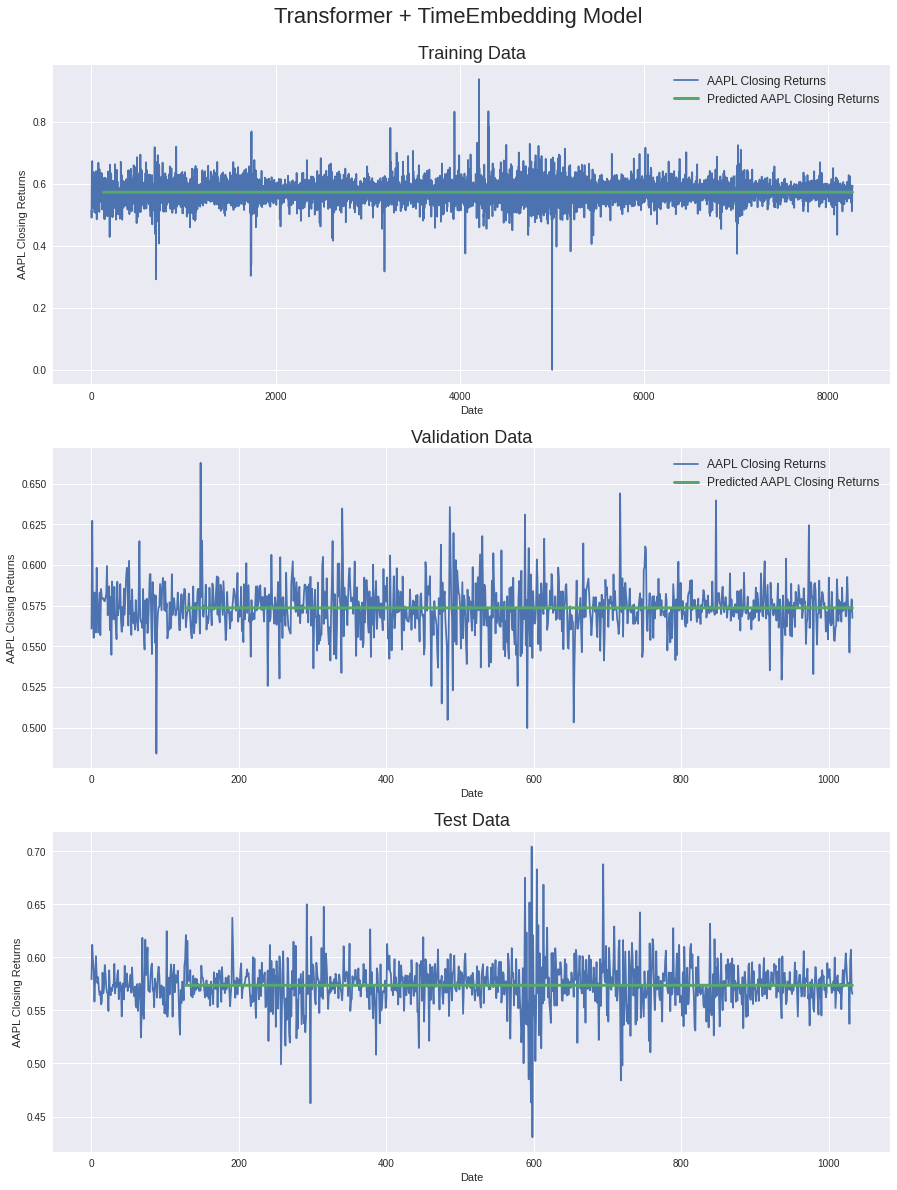

In [ ]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, verbose=1)
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=35, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))  

model = tf.keras.models.load_model('/content/Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))
###############################################################################
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='AAPL Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('AAPL Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='AAPL Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('AAPL Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='AAPL Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('AAPL Closing Returns')

### Plot the loss function
Here we plot the loss function, and we can find that with the increase of the epoch, the loss continiously decreasing. And there's no overfitting.

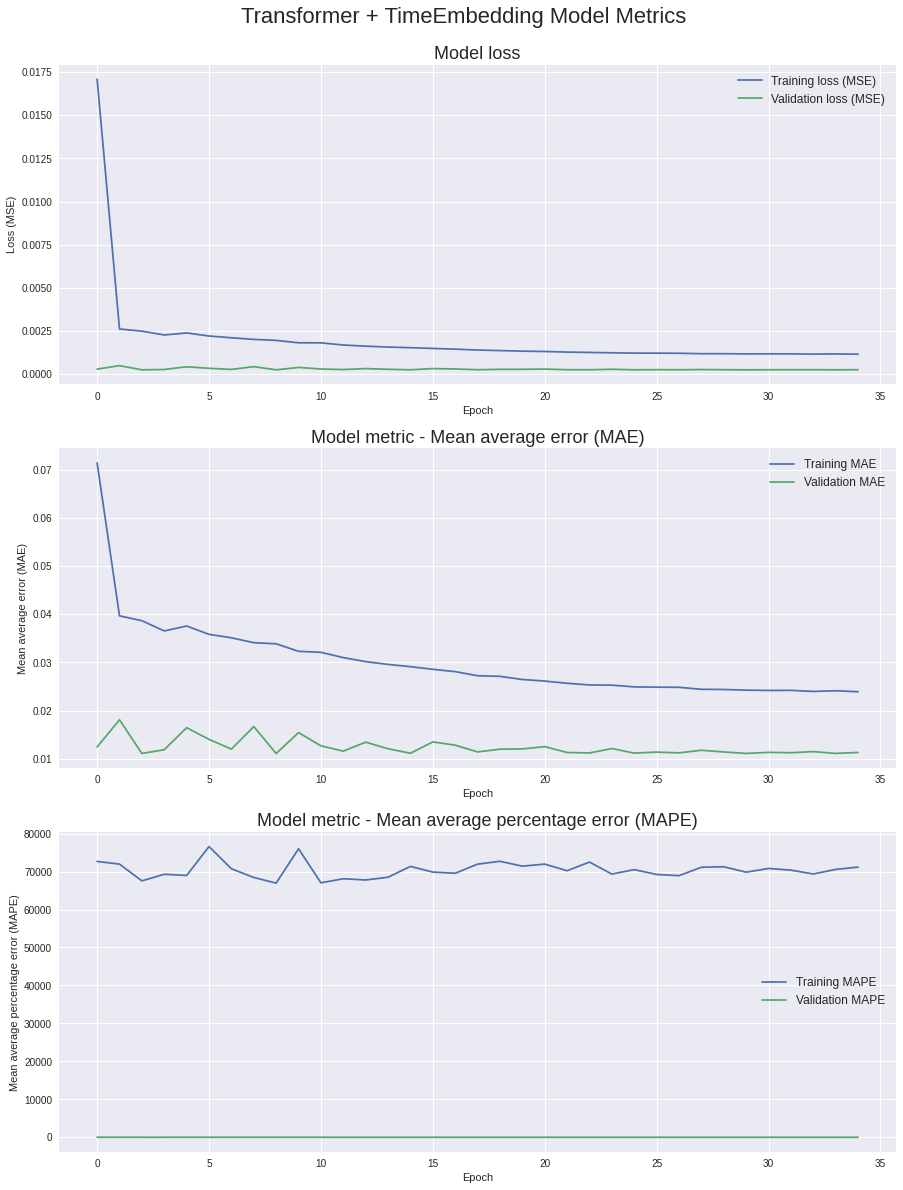

In [ ]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)

### The Structure of the Transformer

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="AAPL_Transformer+TimeEmbedding.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,)

NameError: ignored

### Prediction for the Stock Price

So as we could find above, even we use the Transformer model we could not get efficient information or prediction, But if we add a moving average effect, with a window of 10 days, it could offer a better predictioon. This model can analyse the trend and also the increase or decrease of the stock price. But of course it has some error, in some extreme cases.

In [ ]:
AAPL_path = '/content/drive/MyDrive/AAPL.csv'

data = pd.read_csv(AAPL_path, delimiter=',', usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Replace 0 to avoid dividing by 0 later on
data['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
data.sort_values('Date', inplace=True)

# Apply moving average with a window of 10 days to all columns
data[['Open', 'High', 'Low', 'Close', 'Volume']] = data[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean() 

# Drop all rows with NaN values
data.dropna(how='any', axis=0, inplace=True) 
data

,Date,Open,High,Low,Close,Volume
9,1980-12-26,0.129799,0.130245,0.129687,0.129687,114705920.0
10,1980-12-29,0.133036,0.133482,0.132924,0.132924,77118720.0
11,1980-12-30,0.136551,0.136998,0.136440,0.136440,66418240.0
12,1980-12-31,0.140513,0.140960,0.140402,0.140402,59420480.0
13,1981-01-02,0.144364,0.144866,0.144252,0.144252,52942400.0
...,...,...,...,...,...,...
10327,2021-11-26,155.421999,157.855000,154.287999,156.408002,88598510.0
10328,2021-11-29,156.515999,158.934001,155.418999,157.433002,91110070.0
10329,2021-11-30,157.478000,160.298001,156.467999,158.963002,102592600.0
10330,2021-12-01,159.231999,162.179001,157.986999,160.340002,111872230.0


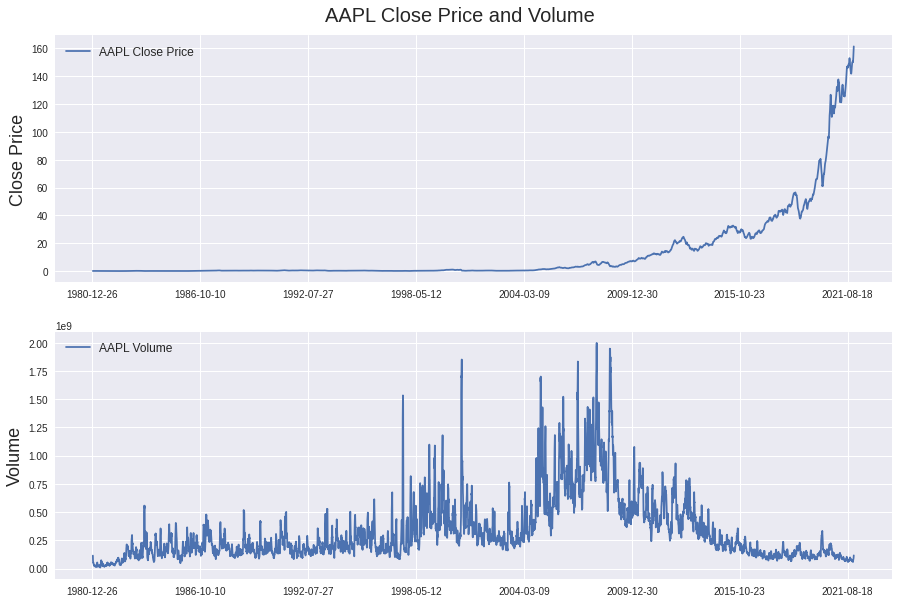

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("AAPL Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(data['Close'], label='AAPL Close Price')
ax1.set_xticks(range(0, data.shape[0], 1464))
ax1.set_xticklabels(data['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(data['Volume'], label='AAPL Volume')
ax2.set_xticks(range(0, data.shape[0], 1464))
ax2.set_xticklabels(data['Date'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

In [ ]:
data

,Date,Open,High,Low,Close,Volume
9,1980-12-26,0.129799,0.130245,0.129687,0.129687,114705920.0
10,1980-12-29,0.133036,0.133482,0.132924,0.132924,77118720.0
11,1980-12-30,0.136551,0.136998,0.136440,0.136440,66418240.0
12,1980-12-31,0.140513,0.140960,0.140402,0.140402,59420480.0
13,1981-01-02,0.144364,0.144866,0.144252,0.144252,52942400.0
...,...,...,...,...,...,...
10327,2021-11-26,155.421999,157.855000,154.287999,156.408002,88598510.0
10328,2021-11-29,156.515999,158.934001,155.418999,157.433002,91110070.0
10329,2021-11-30,157.478000,160.298001,156.467999,158.963002,102592600.0
10330,2021-12-01,159.231999,162.179001,157.986999,160.340002,111872230.0


In [ ]:
'''Calculate percentage change'''

data['Open'] = data['Open'].pct_change() # Create arithmetic returns column
data['High'] = data['High'].pct_change() # Create arithmetic returns column
data['Low'] = data['Low'].pct_change() # Create arithmetic returns column
data['Close'] = data['Close'].pct_change() # Create arithmetic returns column
data['Volume'] = data['Volume'].pct_change()

data.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Create indexes to split dataset'''

times = sorted(data.index.values)
last_10pct = sorted(data.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(data.index.values)[-int(0.2*len(times))] # Last 20% of series

###############################################################################
'''Normalize price columns'''
#
min_return = min(data[(data.index < last_20pct)][['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(data[(data.index < last_20pct)][['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
#data['Open'] = (data['Open'] - min_return) / (max_return - min_return)
#data['High'] = (data['High'] - min_return) / (max_return - min_return)
#data['Low'] = (data['Low'] - min_return) / (max_return - min_return)
#data['Close'] = (data['Close'] - min_return) / (max_return - min_return)
data['Open'] = data['Open'] * 100
data['High'] = data['High'] * 100
data['Low'] = data['Low'] * 100
data['Close'] = data['Close'] * 100

###############################################################################
'''Normalize volume column'''

min_volume = data[(data.index < last_20pct)]['Volume'].min(axis=0)
max_volume = data[(data.index < last_20pct)]['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
data['Volume'] = (data['Volume'] - min_volume) / (max_volume - min_volume)

###############################################################################
'''Create training, validation and test split'''

data_train = data[(data.index < last_20pct)]  # Training data are 80% of total data
data_val = data[(data.index >= last_20pct) & (data.index < last_10pct)]
data_test = data[(data.index >= last_10pct)]

# Remove date column
data_train.drop(columns=['Date'], inplace=True)
data_val.drop(columns=['Date'], inplace=True)
data_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = data_train.values
val_data = data_val.values
test_data = data_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

data_train

Training data shape: (8258, 5)
Validation data shape: (1032, 5)
Test data shape: (1032, 5)


,Open,High,Low,Close,Volume
10,2.493548,2.484999,2.495693,2.495693,0.069854
11,2.642601,2.633761,2.644820,2.644820,0.164642
12,2.901549,2.892092,2.903922,2.903922,0.181396
13,2.740310,2.771216,2.742488,2.742488,0.179558
14,2.241975,2.195683,2.205027,2.205027,0.198508
...,...,...,...,...,...
8263,-0.927204,-0.834353,-0.829700,-0.687618,0.241772
8264,-0.754262,-0.738491,-0.747833,-0.707990,0.246533
8265,-0.617312,-0.515131,-0.515921,-0.481579,0.252278
8266,-0.429654,-0.434034,-0.509241,-0.649076,0.269407


In [ ]:
data_train

,Open,High,Low,Close,Volume
10,2.493548,2.484999,2.495693,2.495693,0.069854
11,2.642601,2.633761,2.644820,2.644820,0.164642
12,2.901549,2.892092,2.903922,2.903922,0.181396
13,2.740310,2.771216,2.742488,2.742488,0.179558
14,2.241975,2.195683,2.205027,2.205027,0.198508
...,...,...,...,...,...
8263,-0.927204,-0.834353,-0.829700,-0.687618,0.241772
8264,-0.754262,-0.738491,-0.747833,-0.707990,0.246533
8265,-0.617312,-0.515131,-0.515921,-0.481579,0.252278
8266,-0.429654,-0.434034,-0.509241,-0.649076,0.269407


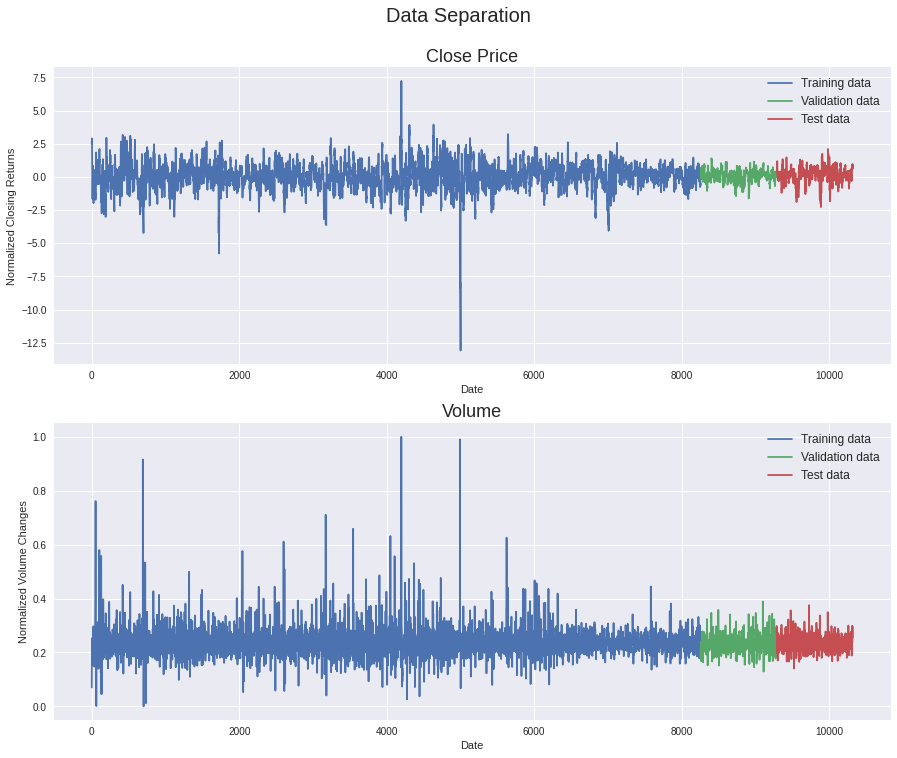

In [ ]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), data_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), data_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), data_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), data_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), data_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), data_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [ ]:
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8130, 128, 5) (8130,)
(904, 128, 5) (904,)


In [ ]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model


model = create_model()
model.summary()

callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5', 
                                              monitor='val_loss', 
                                              save_best_only=True, 
                                              verbose=1)

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=35, 
                    callbacks=[callback],
                    validation_data=(X_val, y_val))  

model = tf.keras.models.load_model('/content/Transformer+TimeEmbedding.hdf5',
                                   custom_objects={'Time2Vector': Time2Vector, 
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 5)]     0           []                               
                                                                                                  
 time2_vector_2 (Time2Vector)   (None, 128, 2)       512         ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 128, 7)       0           ['input_2[0][0]',                
                                                                  'time2_vector_2[0][0]']         
                                                                                                  
 transformer_encoder_6 (Transfo  (None, 128, 7)      99114       ['concatenate_1[0][0]',    

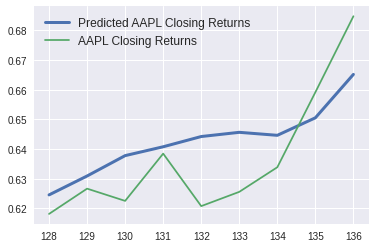

In [ ]:
aa = model.predict(X_train[7990:7999])
plt.plot(np.arange(seq_len, aa.shape[0]+seq_len), aa, linewidth=3, label='Predicted AAPL Closing Returns')
plt.plot(np.arange(seq_len, aa.shape[0]+seq_len),X_train[7991:8000,127, 3], label='AAPL Closing Returns')
plt.legend(loc="best", fontsize=12)
plt.show()

In [ ]:
X_train[:,127,3].shape

(8130,)

In [ ]:
###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

#
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='AAPL Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('AAPL Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='AAPL Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('AAPL Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='AAPL Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted AAPL Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('AAPL Closing Returns')
ax31.legend(loc="best", fontsize=12)

In [ ]:

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Moving Average - Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)

## CONCLUSION

Based on the training result, we find that:

1. For the original data, it's hard to use it to predict future data.

2. For the data after the process of moving average, even if there are still some errors but from the validation set we note that the result is acceptable. We could use it to predict the trend of the stock price and also the timing to sell or buy the stock. But it's based on the data of moving average, so we still need further improvement for this model.

## REFERENCE

[Ding et al., 2014] Xiao Ding, Yue Zhang, Ting Liu, and
Junwen Duan. Using structured events to predict stock
price movement: An empirical investigation. In Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), pages 1415–1425, 2014. 

[Ding et al., 2015] Xiao Ding, Yue Zhang, Ting Liu, and
Junwen Duan. Deep learning for event-driven stock prediction. In Twenty-Fourth International Joint Conference
on Artificial Intelligence, 2015. 

[Ding et al., 2016] Xiao Ding, Yue Zhang, Ting Liu, and
Junwen Duan. Knowledge-driven event embedding for
stock prediction. In Proceedings of COLING 2016, the
26th International Conference on Computational Linguistics: Technical Papers, pages 2133–2142, 2016. 

[Fader et al., 2011] Anthony Fader, Stephen Soderland, and
Oren Etzioni. Identifying relations for open information
extraction. In Proceedings of the conference on empirical methods in natural language processing, pages 1535–1545. Association for Computational Linguistics, 2011. 

[Fama et al., 1969] Eugene F Fama, Lawrence Fisher,
Michael C Jensen, and Richard Roll. The adjustment of
stock prices to new information. International economic
review, 10(1):1–21, 1969. 

[He et al., 2016] Kaiming He, Xiangyu Zhang, Shaoqing
Ren, and Jian Sun. Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition, pages 770–778, 2016. 

[Hinton et al., 2011] Geoffrey E Hinton, Alex Krizhevsky,
and Sida D Wang. Transforming auto-encoders. In International Conference on Artificial Neural Networks, pages
44–51. Springer, 2011. 

[Hinton et al., 2018] Geoffrey E Hinton, Sara Sabour, and
Nicholas Frosst. Matrix capsules with em routing. 2018. 

[Hu et al., 2018] Ziniu Hu, Weiqing Liu, Jiang Bian, Xuanzhe Liu, and Tie-Yan Liu. Listening to chaotic whispers:
A deep learning framework for news-oriented stock trend
prediction. In Proceedings of the Eleventh ACM International Conference on Web Search and Data Mining, pages
261–269. ACM, 2018. 

[Lavrenko et al., 2000] Victor Lavrenko, Matt Schmill,
Dawn Lawrie, Paul Ogilvie, David Jensen, and James
Allan. Mining of concurrent text and time series. In
KDD-2000 Workshop on Text Mining, volume 2000, pages
37–44, 2000. 